In [1]:
import pandas as pd
from typing import Dict, List
from collections import Counter
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
path1="/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/data/Dataset1.csv"
path2="/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/data/Dataset2.csv"
path3="/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/data/Dataset3.xlsx"

In [3]:
df=pd.read_csv(path2)

In [4]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin

class DateTimeTransformer(BaseEstimator, TransformerMixin):
        
    def _correctDates(self):
        for i in range(len(self.data)):
            for j in range(i,len(self.data)):
                if self.data["time_period"][i] == self.data["time_period"][j]:
                    self.data["Start date"][j] = self.data["Start date"][i]
                    self.data["end date"][j] = self.data["end date"][i]
        for i in range(len(self.data)): 
            try:
                self.data['end date'][i] = pd.to_datetime(self.data['end date'][i] )
                self.data['Start date'][i]  = pd.to_datetime(self.data['Start date'][i] )
            except Exception as e:
                rows = self.data[self.data['time_period']==self.data['time_period'][i]+1]
                year = rows["end date"].iloc[0].year

                date = self.data['Start date'][i].split("-")
                self.data['Start date'][i] = pd.to_datetime(str(year)+'-'+date[1]+'-'+date[0],format="%Y-%b-%d")
                date = self.data['end date'][i].split("-")
                self.data['end date'][i] = pd.to_datetime(str(year)+'-'+date[1]+'-'+date[0],format="%Y-%b-%d")

        self.data['Start date'] = pd.to_datetime(self.data['Start date'])
        self.data['end date'] = pd.to_datetime(self.data['end date'])

    def fit(self, X, y=None):
        self.data = X.copy()
        return self
    
    def transform(self, X, y=None):
        self._correctDates()
        return self.data
    


In [62]:
s=DateTimeTransformer()
qqqs=s.fit_transform(df)


In [5]:
df1=pd.read_csv(r'/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/artifacts/raw/2/test.csv')

In [6]:
df2=pd.read_csv(r'/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/artifacts/raw/2/train.csv')

In [7]:
df1

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,94087,31,56668,20-Sep,10-Oct,19.0,4100.0,27.0,1.6,344.5,0.7
1,95129,48,39741,9/12/2021,10/2/2021,40.0,6305.0,48.0,4.8,755.5,0.8
2,94087,45,56668,11-Jul,31-Jul,77.0,5317.0,87.0,6.5,446.8,1.6
3,95128,57,36975,3/20/2022,4/9/2022,69.0,4648.0,86.0,8.9,598.6,1.9
4,95035,56,79655,2/27/2022,3/19/2022,131.0,7989.0,173.0,7.8,477.6,2.2
5,94086,67,50477,16-Oct,5-Nov,39.0,984.0,41.0,3.7,92.8,4.2
6,94086,46,50477,1-Aug,21-Aug,104.0,5524.0,114.0,9.8,521.1,2.1
7,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
8,95129,38,39741,2/14/2021,3/6/2021,33.0,4468.0,38.0,4.0,535.4,0.9
9,95035,32,79655,10/11/2020,10/31/2020,77.0,5091.0,85.0,4.6,304.3,1.7


In [8]:
df2

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,94087,59,56668,1-May,21-May,530.0,12581.0,596.0,44.5,1057.2,4.7
1,94086,61,50477,12-Jun,2-Jul,424.0,3615.0,477.0,40.0,341.0,13.2
2,95127,38,66256,2/14/2021,3/6/2021,238.0,6684.0,284.0,17.1,480.4,4.2
3,95035,46,79655,8/1/2021,8/21/2021,263.0,9213.0,311.0,15.7,550.8,3.4
4,95128,66,36975,9/25/2022,10/15/2022,54.0,1584.0,60.0,7.0,204.0,3.8
...,...,...,...,...,...,...,...,...,...,...,...
195,95035,28,79655,7/19/2020,8/8/2020,130.0,3353.0,148.0,7.8,200.4,4.4
196,95129,27,39741,6/28/2020,7/18/2020,27.0,2027.0,42.0,3.2,242.9,2.1
197,95127,27,66256,6/28/2020,7/18/2020,266.0,4059.0,287.0,19.1,291.7,7.1
198,94086,36,50477,3-Jan,23-Jan,383.0,6948.0,427.0,36.1,655.5,6.1


In [53]:
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
2,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
3,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6
4,95129,54,39741,1/16/2022,2/5/2022,624.0,13479.0,817.0,74.8,1615.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...
298,94085,59,23223,1-May,21-May,165.0,2315.0,192.0,33.8,474.7,8.3
299,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
300,94085,61,23223,12-Jun,2-Jul,219.0,1696.0,255.0,44.9,347.8,15.0
301,94085,27,23223,28-Jun,18-Jul,53.0,1379.0,61.0,10.9,282.8,4.4


In [54]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('date', DateTimeTransformer(df)),
])

rs = pipeline.transform(df)

In [55]:
rs

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
2,95129,55,39741,2022-02-06,2022-02-26,110.0,10194.0,175.0,13.2,1221.5,1.7
3,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
4,95129,54,39741,2022-01-16,2022-02-05,624.0,13479.0,817.0,74.8,1615.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...
298,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.0,33.8,474.7,8.3
299,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.0,30.8,276.4,14.1
300,94085,61,23223,2022-06-12,2022-07-02,219.0,1696.0,255.0,44.9,347.8,15.0
301,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.0,10.9,282.8,4.4


In [50]:
a=DateTimeTransformer(df)
aa=a.fit_transform(df)

In [51]:
a.correctDates()

AttributeError: 'DateTimeTransformer' object has no attribute 'correctDates'

In [ ]:
a.data

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
2,95129,55,39741,2022-02-06,2022-02-26,110.0,10194.0,175.0,13.2,1221.5,1.7
3,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
4,95129,54,39741,2022-01-16,2022-02-05,624.0,13479.0,817.0,74.8,1615.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...
298,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.0,33.8,474.7,8.3
299,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.0,30.8,276.4,14.1
300,94085,61,23223,2022-06-12,2022-07-02,219.0,1696.0,255.0,44.9,347.8,15.0
301,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.0,10.9,282.8,4.4


In [ ]:
def calculate_central_tendencies(df : pd.DataFrame) -> Dict[str,Dict[str,float]]:
    """this function calculate the central tendencies : mean , median , mode , min , max of each column in the dataframe
    Args:
        df (pd.Dataframe): pandas dataframe to calculate the central tendencies

    Returns:
        Dict: dictionary of the central tendencies of each column
    """
    tendencies={}
    new_df=df.copy()

    for column in new_df.columns:
        flag=False
        if new_df[column].dtype=='object' or new_df[column].dtype=='string':
            tendencies[column] = {'min': None, 'max': None, 'mean': None, 'median': None, 'mode': None, 'std': None}
        else:
            if new_df[column].dtype=='datetime64[ns]':
                flag=True
                new_df[column]=new_df[column].astype(np.int64)
                
            #calculate mean 
            col_len=len(new_df[column])
            mean=sum(new_df[column])/col_len

            #calculate median
            sorted_column=sorted(new_df[column])
            if col_len%2==0:
                median1 = sorted_column[col_len//2]
                median2 = sorted_column[col_len//2-1]
                median=(median1+median2)/2
            else:
                median=sorted_column[col_len//2]

            #calculate mode
            counter = Counter(new_df[column])
            mode = counter.most_common(1)[0][0] 

            #calculate min    
            minimum=sorted_column[0]

            #calculate max
            maximum=sorted_column[-1]

            #calculate standard deviation
            std=0
            for data in new_df[column]:
                std+=((data-mean)**2)
            std=std/col_len
            std=std**0.5

            if df[column].dtype=='datetime64[ns]':
                mean, median, mode, minimum, maximum, std = pd.to_datetime([mean, median, mode, minimum, maximum, std])
                flag=False

            tendencies[column]={'min':minimum,'max':maximum,'mean':mean,'median':median,'mode':mode,'std':std}
            
    return tendencies


def quartiles(df : pd.DataFrame, percentiles : list) -> Dict[str,List[float]] :
    """ this function calculate the quartiles of each column in the dataframe

    Args:
        df (pd.DataFrame): the dataframe to calculate the quartiles
        percentiles (List): list of the percentiles to calculate

    Returns:
        Dict[str,Dict[str,float]]: dictionary of the quartiles of each column
    """
    new_df=df.copy()
    quartiles_dict = {}

    for percentile in percentiles:
        if not (0 <= percentile <= 1):
            raise ValueError("Percentile must be between 0 and 1")

    indexes = [(int(percentile * len(new_df)),percentile) for percentile in percentiles]

    for col in new_df.columns:
        col_quartiles=[]
        sorted_column = sorted(new_df[col])
        for index,percentile in indexes :
            if percentile == 0 :
                tendencies=calculate_central_tendencies(new_df)[col]
                col_quartiles.append(tendencies.get('min'))
            elif percentile == 1 :
                col_quartiles.append(tendencies.get('max'))
            else :
                col_quartiles.append(sorted_column[index])
        quartiles_dict[col] = col_quartiles

    return quartiles_dict

def find_outliers(df : pd.DataFrame, show : bool = False) -> pd.DataFrame:
    """ Drops outliers from a DataFrame using the IQR method.

    Args:
        df (pd.Dataframe): the dataset to drop outliers from
    
    Returns:
        pd.Dataframe: the dataset without outliers
    """
    new_df=df.copy()

    quartiles_dict = quartiles(new_df, [0, 0.25, 0.5, 0.75, 1])

    for col in new_df.columns:
        if df[col].dtype == 'datetime64[ns]' or df[col].dtype == 'object' or df[col].dtype == 'string':
            continue
        q1, q3 = quartiles_dict[col][1], quartiles_dict[col][3]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        if show:
            print(f"Column {col} : lower bound = {lower_bound} , upper bound = {upper_bound}")
            print(f"Outliers : {new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)][col]}")

        new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]

    return new_df

def drop_outliers(df : pd.DataFrame, show : bool = False, stabelize : bool = False) -> pd.DataFrame:
    """ drop outliers until data stabilizes

    Args:
        df (pd.DataFrame): the dataframe to drop outliers from

    Returns:
        pd.DataFrame: the dataframe without outliers
    """
    new_df=df.copy()
    if stabelize:
        while True:
            df_without_outliers = find_outliers(new_df,show)
            if len(df_without_outliers) == len(new_df):
                return df_without_outliers
            new_df = df_without_outliers
    
    else :
        df_without_outliers = find_outliers(new_df,show)
        return df_without_outliers
    
    

In [ ]:
df=a.data.copy()

In [ ]:
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
2,95129,55,39741,2022-02-06,2022-02-26,110.0,10194.0,175.0,13.2,1221.5,1.7
3,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
4,95129,54,39741,2022-01-16,2022-02-05,624.0,13479.0,817.0,74.8,1615.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...
298,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.0,33.8,474.7,8.3
299,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.0,30.8,276.4,14.1
300,94085,61,23223,2022-06-12,2022-07-02,219.0,1696.0,255.0,44.9,347.8,15.0
301,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.0,10.9,282.8,4.4


In [ ]:
new_df=drop_outliers(df,stabelize=False)

In [ ]:
new_df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
5,95129,30,39741,2020-08-30,2020-09-19,20.0,1773.0,20.0,2.4,212.4,1.1
6,95129,31,39741,2020-09-20,2020-10-10,12.0,2120.0,12.0,1.4,254.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...
297,94085,64,23223,2022-08-14,2022-09-03,92.0,1091.0,111.0,18.9,223.7,10.2
298,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.0,33.8,474.7,8.3
299,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.0,30.8,276.4,14.1
301,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.0,10.9,282.8,4.4


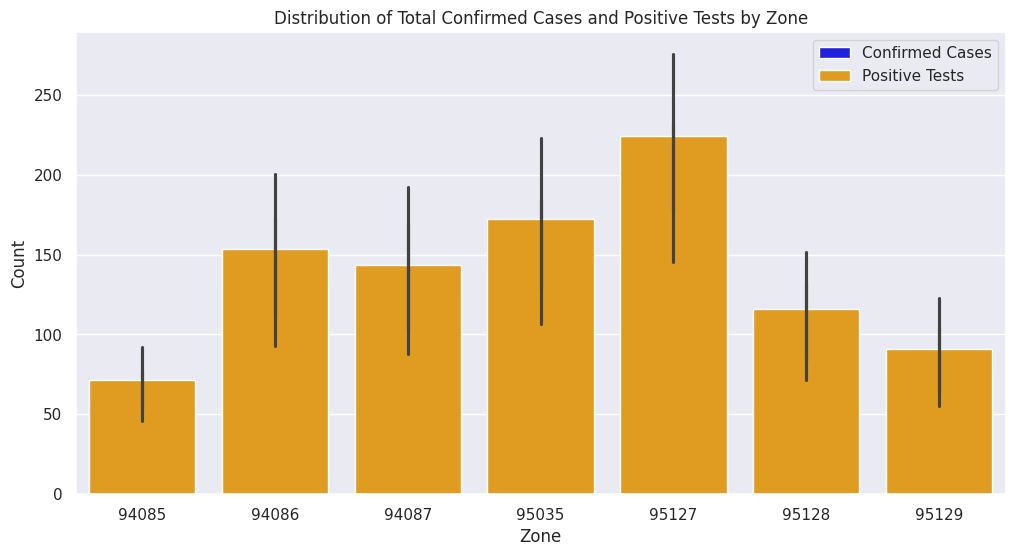

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(x='zcta', y='case count', data=new_df, color='blue', label='Confirmed Cases')
sns.barplot(x='zcta', y='positive tests', data=new_df, color='orange', label='Positive Tests')

plt.xlabel('Zone')
plt.ylabel('Count')
plt.title('Distribution of Total Confirmed Cases and Positive Tests by Zone')
plt.legend()
plt.show()


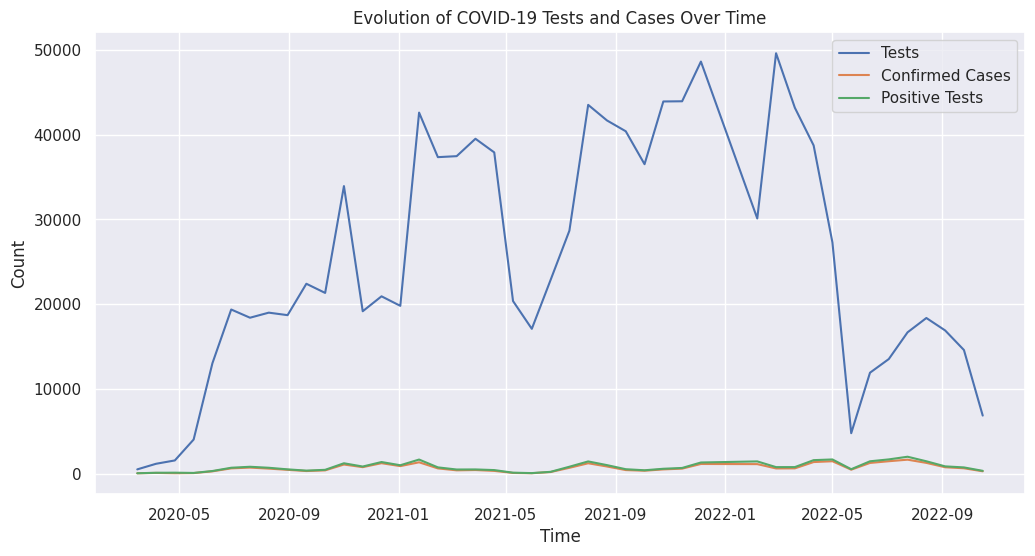

In [ ]:
# Group by 'Start date' and sum the values
df_time = new_df.groupby('Start date')[['test count', 'case count', 'positive tests']].sum()

plt.figure(figsize=(12, 6))

plt.plot(df_time.index, df_time['test count'], label='Tests')
plt.plot(df_time.index, df_time['case count'], label='Confirmed Cases')
plt.plot(df_time.index, df_time['positive tests'], label='Positive Tests')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Evolution of COVID-19 Tests and Cases Over Time')
plt.legend()
plt.show()



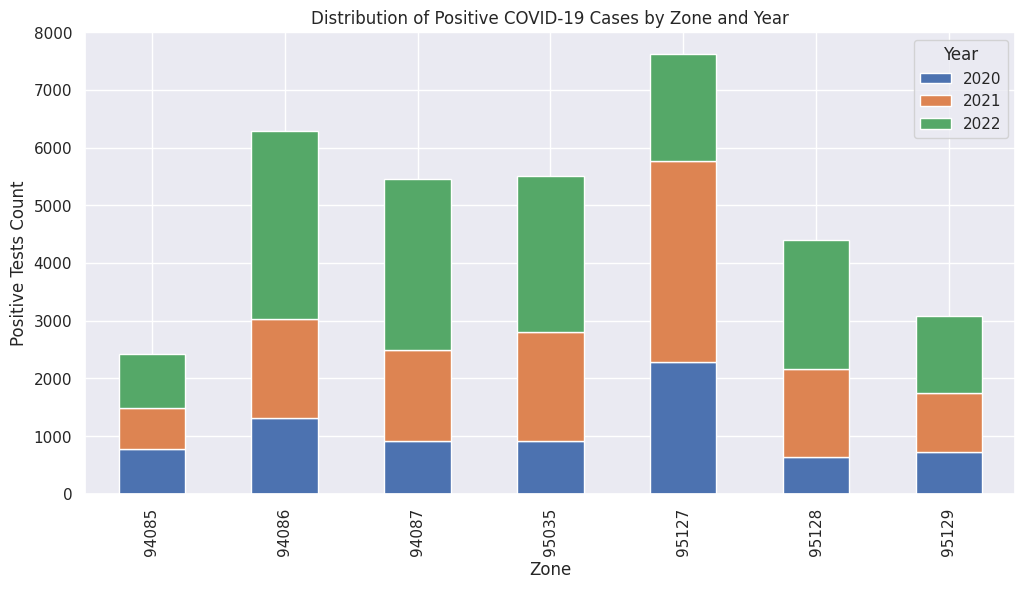

In [ ]:
new_df['Year'] = new_df['Start date'].dt.year

# Group by 'zcta' and 'Year' and sum the values
df_zone_year = new_df.groupby(['zcta', 'Year'])['positive tests'].sum().unstack()

df_zone_year.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Zone')
plt.ylabel('Positive Tests Count')
plt.title('Distribution of Positive COVID-19 Cases by Zone and Year')
plt.legend(title='Year')
plt.show()


In [ ]:
new_df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate,Year,Population/Test Ratio
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9,2020,15.627605
1,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8,2021,8.251869
3,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6,2021,13.102868
5,95129,30,39741,2020-08-30,2020-09-19,20.0,1773.0,20.0,2.4,212.4,1.1,2020,22.414552
6,95129,31,39741,2020-09-20,2020-10-10,12.0,2120.0,12.0,1.4,254.0,0.6,2020,18.745755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,94085,64,23223,2022-08-14,2022-09-03,92.0,1091.0,111.0,18.9,223.7,10.2,2022,21.285976
298,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.0,33.8,474.7,8.3,2022,10.031533
299,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.0,30.8,276.4,14.1,2022,17.227745
301,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.0,10.9,282.8,4.4,2020,16.840464


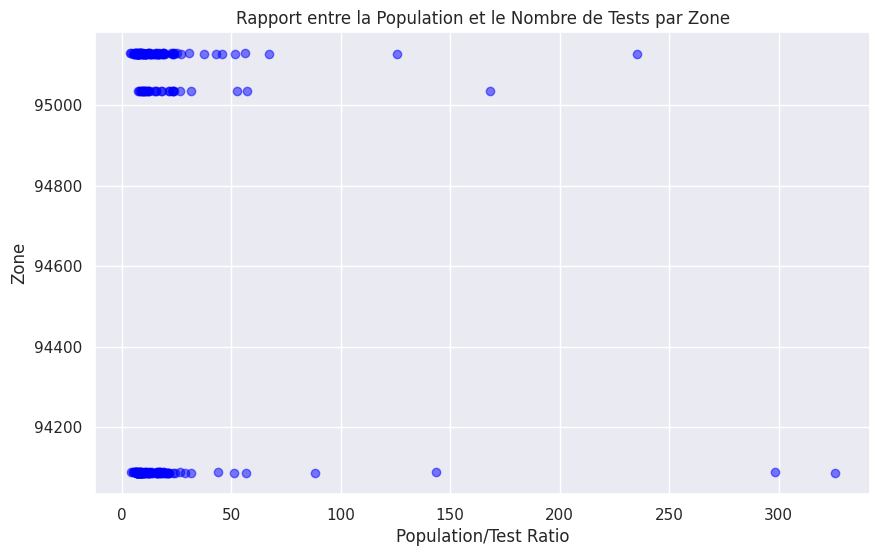

In [ ]:
new_df['Population/Test Ratio'] = new_df['population'] / new_df['test count']

plt.figure(figsize=(10, 6))
plt.scatter(new_df['Population/Test Ratio'], new_df['zcta'], color='blue', alpha=0.5)
plt.xlabel('Population/Test Ratio')
plt.ylabel('Zone')
plt.title('Rapport entre la Population et le Nombre de Tests par Zone')
plt.show()


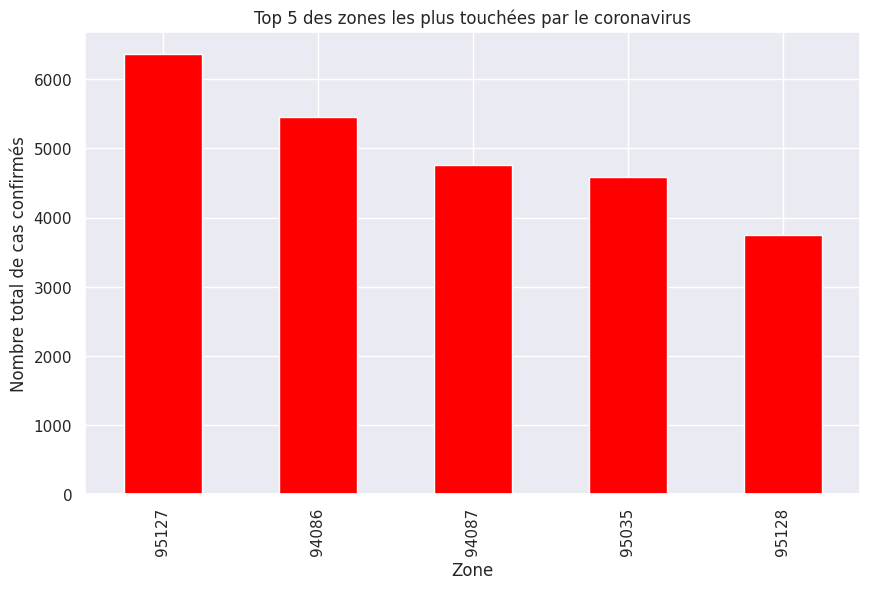

In [ ]:
# Trier le DataFrame par le nombre total de cas confirmés
top_zones_cases = new_df.groupby('zcta')['case count'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_zones_cases.plot(kind='bar', color='red')
plt.xlabel('Zone')
plt.ylabel('Nombre total de cas confirmés')
plt.title('Top 5 des zones les plus touchées par le coronavirus')
plt.show()
